In [28]:
## State Schema

from typing import TypedDict, Annotated
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages


class State(TypedDict):
    messages: Annotated[list, add_messages]

In [29]:
from dotenv import load_dotenv
import os
load_dotenv()
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [30]:
from langchain_openai import ChatOpenAI
from langchain_groq import ChatGroq

llm = ChatOpenAI(model="gpt-5-2025-08-07")
llm.invoke("Hello")

llm_groq = ChatGroq(model="qwen/qwen3-32b")

llm_groq.invoke("Hey I am Ibo and I like to play basketball")

AIMessage(content="<think>\nOkay, the user is Ibo and he likes basketball. Let me start by acknowledging his name and interest. I should ask him some follow-up questions to engage further. Maybe ask how he got into basketball or his favorite part about playing. Also, offer help with something related to basketball, like tips, strategies, or information about the sport. Need to keep the tone friendly and encouraging. Let me make sure the response is open-ended so he can elaborate. Don't want to assume too much, so asking questions to understand his goals or what he enjoys about the game. Maybe also mention if he plays competitively or just for fun. Yeah, that should cover it. Let me put that all together in a natural way.\n</think>\n\nHey Ibo! That's awesome—basketball is such a dynamic and exciting sport to play! 🏀 I’d love to hear more about what drew you to it. Did you grow up playing, or did you get into it more recently?  \n\nWhat’s your favorite part about the game? Is it the team

In [31]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()

def superbot(state: State):
    return {"messages": [llm_groq.invoke(state["messages"])]}

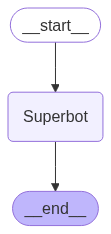

In [32]:

from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition
from IPython.display import Image, display

graph = StateGraph(State)

## node
graph.add_node("Superbot", superbot)
graph.add_edge(START, "Superbot")
graph.add_edge("Superbot", END)

graph_builder = graph.compile(checkpointer=memory)


display(Image(graph_builder.get_graph().draw_mermaid_png()))


In [33]:
config = {"configurable": {"thread_id": "1"}}
graph_builder.invoke({"messages": "Hey I am Ibo and I like to play basketball"}, config)

{'messages': [HumanMessage(content='Hey I am Ibo and I like to play basketball', additional_kwargs={}, response_metadata={}, id='e21c93b2-9f37-41b3-9421-5378e15d677a'),
  AIMessage(content="<think>\nOkay, the user's name is Ibo, and he's into basketball. Let me think about how to respond. First, I should acknowledge his name and his interest. Maybe ask him about his favorite team or position. But wait, the user might be testing if I can generate a thoughtful response. I need to make sure I'm not just asking random questions but engaging in a meaningful way.\n\nHmm, basketball has various aspects. He could be a player, a fan, or maybe a coach. I should ask a question that encourages him to elaborate. For example, asking about his favorite part of the game or how long he's been playing. Also, maybe mention specific aspects like dribbling, shooting, or teamwork to show I know a bit about the sport.\n\nWait, the user might be looking for someone to share experiences or offer advice. I shou

### UPDATES or VALUES

### VALUES: This streams the full state of the graph after each node is called.
### UPDATES: This stream updates to the state of the graph after each node is called.

In [34]:
## Creating a thread
config = {"configurable": {"thread_id": "2"}}

for chunk in graph_builder.stream({"messages": "Hi, my name is Ibo and I like basketball"}, config, stream_mode="updates"):
    print(chunk)

{'Superbot': {'messages': [AIMessage(content="<think>\nOkay, the user is Ibo and he likes basketball. Let me start by greeting him and acknowledging his interest. I should ask him what specific aspects of basketball he's interested in. Maybe he wants to improve his skills, learn more about the game, or discuss recent events in basketball. I need to keep the response open-ended to allow him to elaborate on his interests. Also, I should make sure to stay friendly and encouraging. Let me check for any possible follow-up questions or topics he might bring up. If he's into playing, maybe he needs tips on training or strategies. If he's a fan, he might want to talk about teams or players. I'll keep it general for now and let him guide the conversation further.\n</think>\n\nHi Ibo! Nice to meet you! 🏀 Since you're into basketball, I'd love to hear more about what you enjoy about the game. Do you play it yourself, or are you more of a fan watching NBA/college games? I'd be happy to discuss any

In [35]:
## Creating a thread
config = {"configurable": {"thread_id": "2"}}

for chunk in graph_builder.stream({"messages": "Hi, my name is Ibo and I like basketball"}, config, stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi, my name is Ibo and I like basketball', additional_kwargs={}, response_metadata={}, id='d082aba6-2760-4d65-8974-38d66d56bab6'), AIMessage(content="<think>\nOkay, the user is Ibo and he likes basketball. Let me start by greeting him and acknowledging his interest. I should ask him what specific aspects of basketball he's interested in. Maybe he wants to improve his skills, learn more about the game, or discuss recent events in basketball. I need to keep the response open-ended to allow him to elaborate on his interests. Also, I should make sure to stay friendly and encouraging. Let me check for any possible follow-up questions or topics he might bring up. If he's into playing, maybe he needs tips on training or strategies. If he's a fan, he might want to talk about teams or players. I'll keep it general for now and let him guide the conversation further.\n</think>\n\nHi Ibo! Nice to meet you! 🏀 Since you're into basketball, I'd love to hear more ab

In [36]:
## Creating a thread
config = {"configurable": {"thread_id": "2"}}

for chunk in graph_builder.stream({"messages": "I also like football"}, config, stream_mode="updates"):
    print(chunk)

{'Superbot': {'messages': [AIMessage(content="<think>\nOkay, the user mentioned they like both basketball and football. Let me see how to respond.\n\nFirst, they introduced themselves as Ibo and said they like basketball. Then, in the second message, they repeated the same introduction and added they also like football. Maybe they're testing if I remember the previous conversation or just want to expand the discussion.\n\nI need to acknowledge both sports. Since I already talked about basketball in the first response, now I should focus on football. But also, maybe connect the two. Like, mention how both sports are exciting but different. Ask about their favorite teams or players in football. Maybe ask if they play or just watch.\n\nWait, in the first response, I asked if they play basketball or are a fan. Now, they added football. The user might be a multi-sport enthusiast. I should express enthusiasm for both sports. Maybe mention some popular football leagues like NFL or FIFA. Also,

In [37]:
## Creating a thread
config = {"configurable": {"thread_id": "2"}}

for chunk in graph_builder.stream({"messages": "I also like football"}, config, stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi, my name is Ibo and I like basketball', additional_kwargs={}, response_metadata={}, id='d082aba6-2760-4d65-8974-38d66d56bab6'), AIMessage(content="<think>\nOkay, the user is Ibo and he likes basketball. Let me start by greeting him and acknowledging his interest. I should ask him what specific aspects of basketball he's interested in. Maybe he wants to improve his skills, learn more about the game, or discuss recent events in basketball. I need to keep the response open-ended to allow him to elaborate on his interests. Also, I should make sure to stay friendly and encouraging. Let me check for any possible follow-up questions or topics he might bring up. If he's into playing, maybe he needs tips on training or strategies. If he's a fan, he might want to talk about teams or players. I'll keep it general for now and let him guide the conversation further.\n</think>\n\nHi Ibo! Nice to meet you! 🏀 Since you're into basketball, I'd love to hear more ab

In [38]:
config = {"configurable": {"thread_id": "3"}}

async for event in graph_builder.astream_events({"messages": ["Hi my name is Ibo and I like to play basketball"]}, config, version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi my name is Ibo and I like to play basketball']}}, 'name': 'LangGraph', 'tags': [], 'run_id': '0f8b0743-b480-4ff2-a0c6-ff23e7b5743d', 'metadata': {'thread_id': '3'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi my name is Ibo and I like to play basketball', additional_kwargs={}, response_metadata={}, id='be2e8344-7bc4-4cec-a2fd-ab15d34ec861')]}}, 'name': 'Superbot', 'tags': ['graph:step:1'], 'run_id': '99896faf-ccc3-4fe9-b0d8-0bd55b61c41d', 'metadata': {'thread_id': '3', 'langgraph_step': 1, 'langgraph_node': 'Superbot', 'langgraph_triggers': ('branch:to:Superbot',), 'langgraph_path': ('__pregel_pull', 'Superbot'), 'langgraph_checkpoint_ns': 'Superbot:1c8facd4-7274-b238-2370-226dae896b66'}, 'parent_ids': ['0f8b0743-b480-4ff2-a0c6-ff23e7b5743d']}
{'event': 'on_chat_model_start', 'data': {'input': {'messages': [[HumanMessage(content='Hi my name is Ibo and I like to pla